# OpenCV
Этот ноутбук призван продемонстрировать вам некоторые возможности библиотеки OpenCV. Перед использованием закиньте изображение Лены в Colab.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Для начала прочитаем наше изображение.

In [5]:
img = cv2.imread('content/peshehod.jpeg')

Запринтим изображение, чтобы увидеть, как оно выглядит с точки зрения компьютера:

In [6]:
print(img)

[[[ 71  73  67]
  [ 70  73  64]
  [ 57  65  55]
  ...
  [208 223 215]
  [208 223 215]
  [205 220 212]]

 [[ 53  56  47]
  [ 59  62  53]
  [ 65  70  61]
  ...
  [208 223 215]
  [209 224 216]
  [205 220 212]]

 [[ 29  32  23]
  [ 31  34  25]
  [ 43  48  39]
  ...
  [209 224 216]
  [209 224 216]
  [204 219 211]]

 ...

 [[ 27  28  26]
  [ 23  24  22]
  [ 22  23  21]
  ...
  [206 199 179]
  [206 199 179]
  [207 200 180]]

 [[ 32  33  31]
  [ 28  29  27]
  [ 25  26  24]
  ...
  [184 176 153]
  [185 177 154]
  [185 177 154]]

 [[ 11  12  10]
  [ 12  13  11]
  [ 14  15  13]
  ...
  [150 143 118]
  [151 144 119]
  [152 145 120]]]


А теперь, с помощью matplotlib (так удобнее) отрисуем изображение уже в виде изображения:

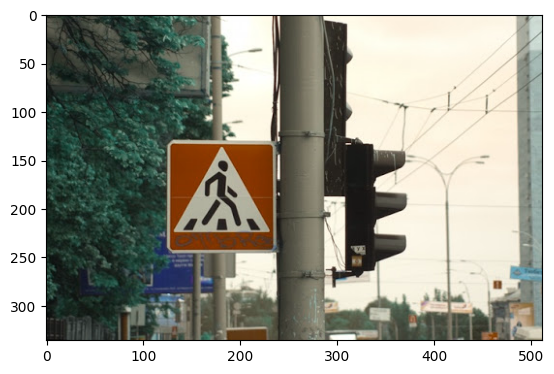

In [7]:
plt.imshow(img)
plt.show()

Видим, что изображение какое-то синее. Дело в том, что часто при чтении изображения оно читается как BGR, а не RGB, но это не трудно исправить

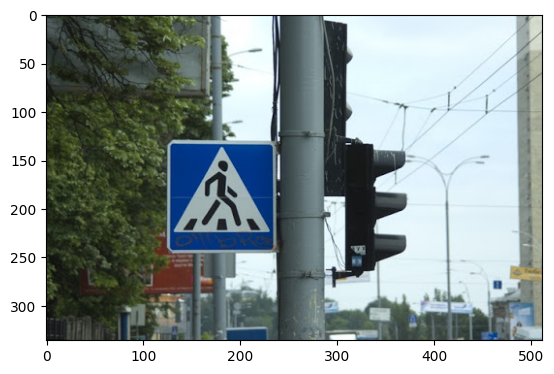

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Кадрирование
Вот теперь все в порядке, можем начать издеваться над нашей Леной. Начнем с кадрирования изображения. Это очень легко делать, просто используя стандартные срезы матрицы нумпая.

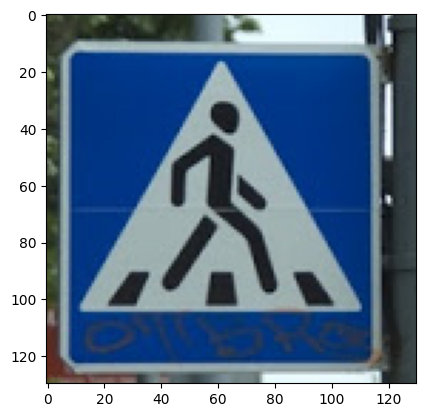

In [10]:
cropped_img = img[120:250, 120:250]
plt.imshow(cropped_img)
plt.show()

## Изменение размера

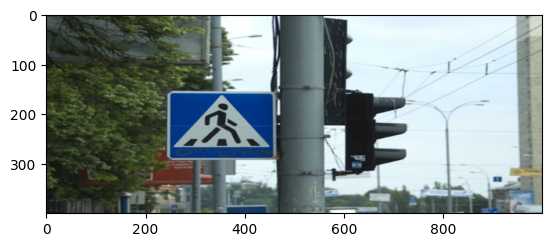

In [12]:
resized_img = cv2.resize(img, (1000, 400), interpolation = cv2.INTER_AREA)
plt.imshow(resized_img)
plt.show()

# Рисование прямоугольников

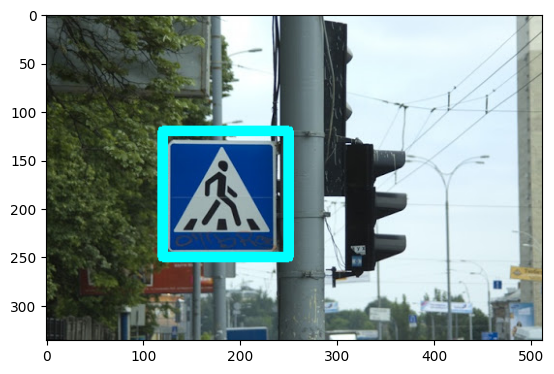

In [13]:
output = img.copy()
cv2.rectangle(output, (120, 120), (250, 250), (0, 255, 255), 10)
plt.imshow(output)
plt.show()

# Текст на изображении

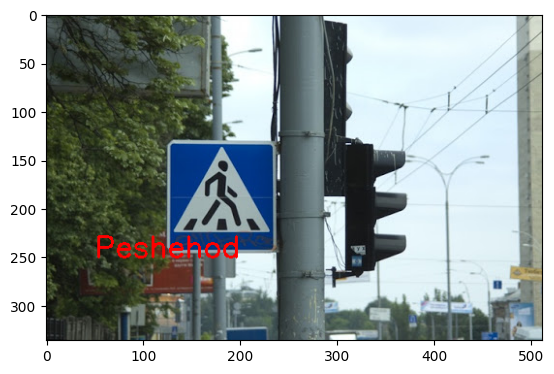

In [21]:
output = img.copy()
cv2.putText(output, "Peshehod", (50, 250), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2) 
plt.imshow(output)
plt.show()

# Градации серого и threshold

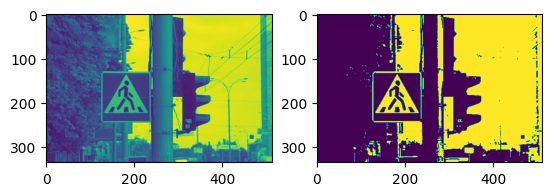

In [22]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 127, 255, 0)
plt.subplot(121)
plt.imshow(gray_img)
plt.subplot(122)
plt.imshow(thresholded_img)
plt.show()

Мы столкнулись с проблемой отображения одномерных изображений, надо отдельно указывать цветовую карту. Сделаем это.

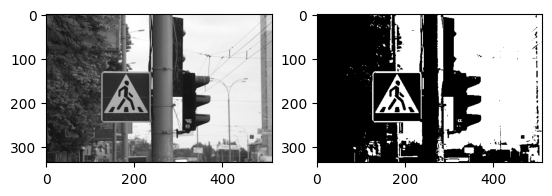

In [23]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 127, 255, 0)
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.show()

# Фильтры
Теперь можно пройтись по различным фильтрами, они пригодятся вам, когда у вас будут зашумленные изображения

In [26]:
noise = np.random.randint(0, 255, (336,512,3)).astype(np.uint8)
noisy_img = cv2.addWeighted(img, 0.7, noise, 0.3, 2.2) # кстати, это способ получить смесь изображений

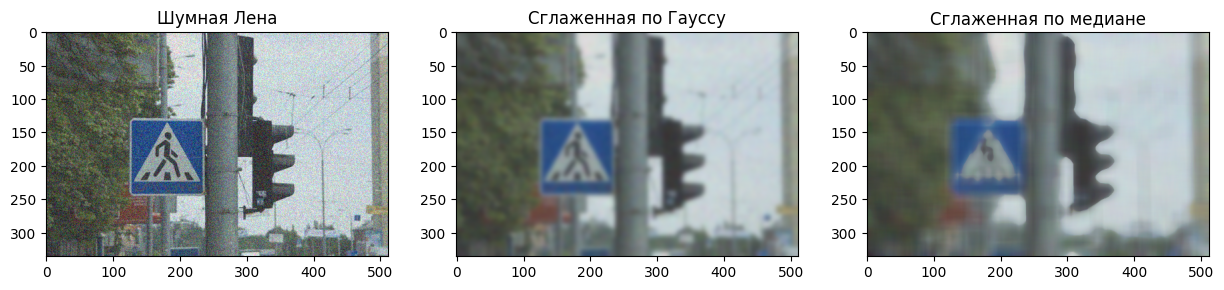

In [27]:
gblurred_img = cv2.GaussianBlur(noisy_img, (21, 21), 0)
mblurred_img = cv2.medianBlur(noisy_img, 21)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Шумная Лена')
plt.imshow(noisy_img)
plt.subplot(132)
plt.title('Сглаженная по Гауссу')
plt.imshow(gblurred_img)
plt.subplot(133)
plt.title('Сглаженная по медиане')
plt.imshow(mblurred_img)
plt.show()

# Задание 1
Для изображения знака сделайте threshold по порогу выше 180. Перед этим переведите изображение в чёрно-белое с помощью функции cv2.cvtColor. Обратите внимание на порядок каналов (если изображение в формате BGR, используйте параметр cv2.COLOR_BGR2GRAY). В строку ниже введите целое число, полученное в результате выполнения кода, данного ниже.

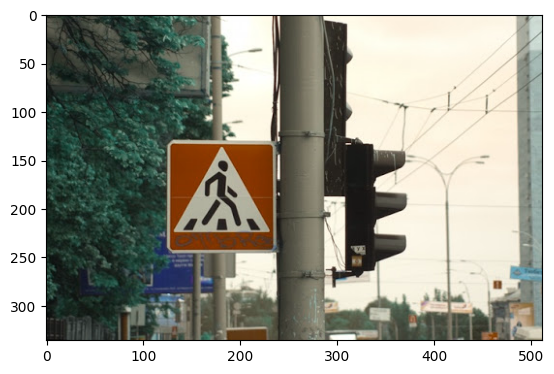

In [67]:
pesh = cv2.imread('content/peshehod.jpeg')
plt.imshow(pesh) #перепутаны местами каналы, не забудьте))

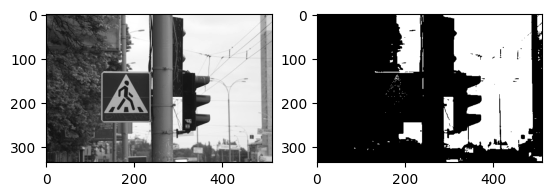

0.017064905425498808


In [68]:
gray_img = cv2.cvtColor(pesh, cv2.COLOR_BGR2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 180, 255, 0)
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.show()

#Введите в поле для ответа число, которое получится после выполнения кода ниже:
print(np.sum(thresholded_img[120:250, 120:250])/np.sum(thresholded_img))

In [69]:
print(np.sum(thresholded_img)/255)

57838.0


# Задание 2
Вам нужно локализовать на изображении дорожный знак с помощью цветового порога. В результате получится маска изображения, на которой будет выделен только знак и небольшой шум на остальной части изображения.

Рекомендуем перевести изображение в HSV и найти информацию о функции inRange.

Финальную маску назовите result_image.

Формат ответа: X.X

Введите в поле для ответа число, которое получится после выполнения кода ниже:

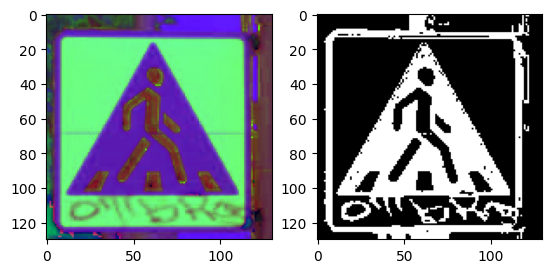

In [108]:
cropped_img = pesh[120:250, 120:250]
frame_HSV = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2HSV)
result_image = cv2.inRange(frame_HSV, (80, 0, 80), (150, 200, 200))

plt.subplot(121)
plt.imshow(frame_HSV, cmap='gray')
plt.subplot(122)
plt.imshow(result_image, cmap='gray')
plt.show()

In [109]:
np.sum(pesh[120:250, 120:250])/np.sum(result_image)

3.246382374264747

# Задание 3

С помощью OpenCV можно получить доступ к различным свойствам изображения, например количеству строк, столбцов и каналов в тензоре картинки; типу данных изображения; количеству пикселей.

В документации библиотеки найдите способ посчитать количество пикселей на картинке с дорожным знаком. После того, как вы считали изображение, вы можете получить доступ, к некоторым свойствам изображения, например количеству. Ответом должно стать целое число.

In [112]:
cv2.countNonZero(gray_img)

57838